In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
N = 5
mu = 1
sigma = 0.2

In [3]:
x_i = np.random.normal(mu, sigma, N)
x_grid = np.linspace(0, 2, 1000)

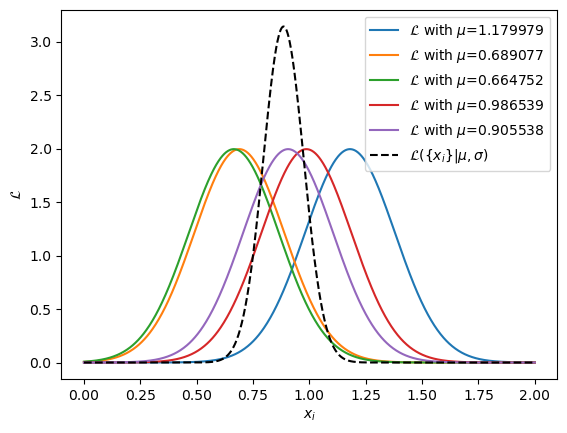

In [4]:
likelihood = np.array([norm.pdf(x_grid,loc = x, scale = sigma) for x in x_i])

for i in range(N):
    plt.plot(x_grid, likelihood[i], label = '$\mathcal{L}$ with $\mu$=%f' %(x_i[i]))

tot_likelihood = np.prod(likelihood, axis=0)

plt.plot(x_grid, tot_likelihood, color = 'black', ls = '--', label = '$\mathcal{L}(\{x_i\}|\mu,\sigma)$')
plt.xlabel('$x_i$')
plt.ylabel('$\mathcal{L}$')
plt.legend()
plt.show()

In [5]:
len(likelihood[0])

1000

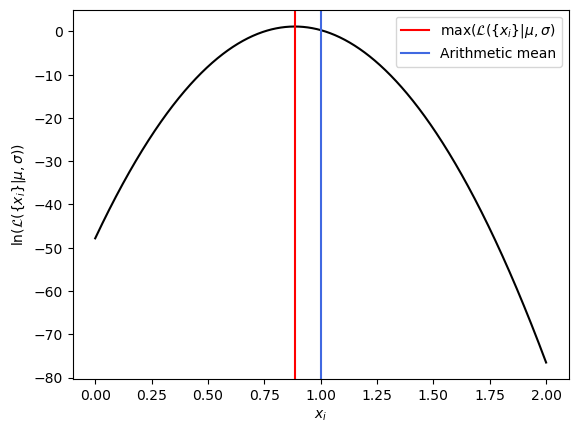

In [6]:
log_likelihood = np.log(tot_likelihood)
index_max = np.argsort(log_likelihood)[-1]
ML_estimator = x_grid[index_max]
plt.plot(x_grid, log_likelihood, color = 'black')
plt.axvline(ML_estimator, color = 'red', label = 'max($\mathcal{L}(\{x_i\}|\mu,\sigma)$')
plt.axvline(mu, color = 'royalblue', label = 'Arithmetic mean')
plt.xlabel('$x_i$')
plt.ylabel('ln($\mathcal{L}(\{x_i\}| \mu,\sigma)$)')
plt.legend()
plt.show()

In [7]:
sigma_mu = np.diff(log_likelihood, n=2)
sigma_mu /= (x_grid[1]-x_grid[0])**2
sigma_mu *= -1
sigma_mu = 1/(sigma_mu**0.5)

fisher_sigma_mu = sigma/N**0.5

print('Fisher matrix error on estimated mean: %0.3f\nFisher matrix error: %0.3f' %(sigma_mu[index_max], fisher_sigma_mu))


Fisher matrix error on estimated mean: 0.089
Fisher matrix error: 0.089


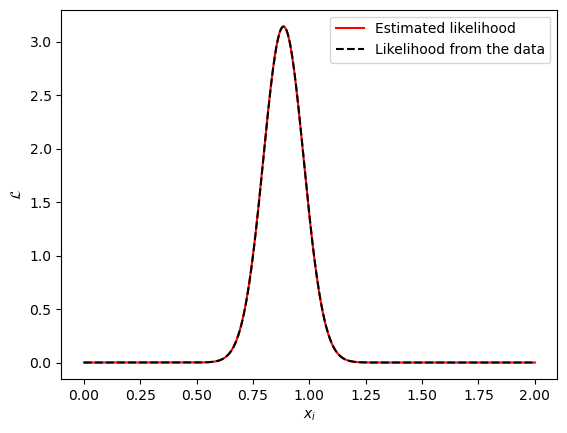

In [8]:
new_likelihood = norm.pdf(x_grid, loc = ML_estimator, scale = sigma_mu[index_max])
plt.plot(x_grid, new_likelihood*(max(tot_likelihood)/max(new_likelihood)), color = 'red', label = 'Estimated likelihood')
plt.plot(x_grid, tot_likelihood, color = 'black', label = 'Likelihood from the data', ls='--')
plt.xlabel('$x_i$')
plt.ylabel('$\mathcal{L}$')
plt.legend()
plt.show()

## Heteoscedastic errors

In [15]:
mu = 1
sigma_i = np.random.normal(0.2, 0.05, N)

In [16]:
x_i = np.array([np.random.normal(mu, sigma) for sigma in sigma_i])

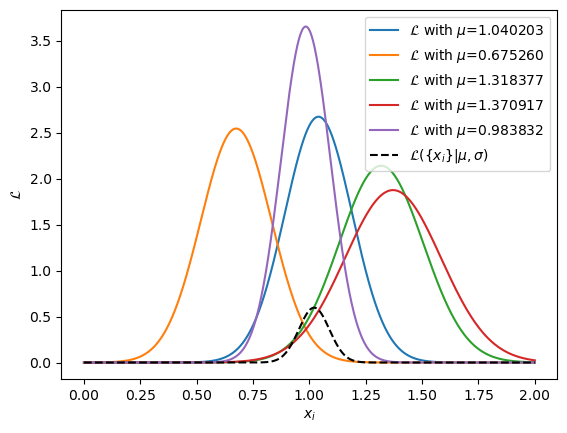

In [17]:
likelihood = np.array([norm.pdf(x_grid, loc = x_i[i], scale = sigma_i[i]) for i in range(N)])

for i in range(N):
    plt.plot(x_grid, likelihood[i], label = '$\mathcal{L}$ with $\mu$=%f' %(x_i[i]))

tot_likelihood = np.prod(likelihood, axis=0)

plt.plot(x_grid, tot_likelihood, color = 'black', ls = '--', label = '$\mathcal{L}(\{x_i\}|\mu,\sigma)$')
plt.xlabel('$x_i$')
plt.ylabel('$\mathcal{L}$')
plt.legend()
plt.show()

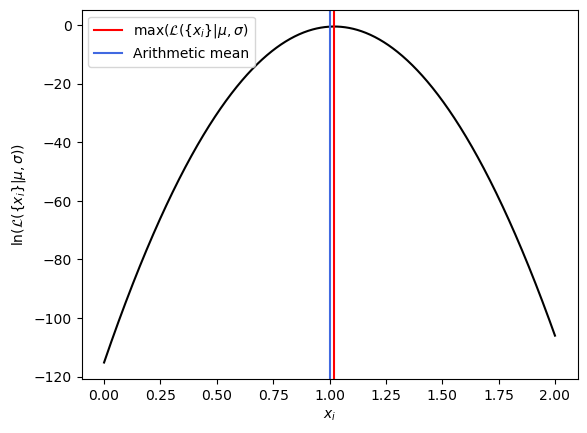

In [18]:
log_likelihood = np.log(tot_likelihood)
index_max = np.argsort(log_likelihood)[-1]
ML_estimator = x_grid[index_max]
#MLE_mu = np.average(x_i, weights=1/sigma_i**2)
plt.plot(x_grid, log_likelihood, color = 'black')
plt.axvline(ML_estimator, color = 'red', label = 'max($\mathcal{L}(\{x_i\}|\mu,\sigma)$')
plt.axvline(mu, color = 'royalblue', label = 'Arithmetic mean')
#plt.axvline(MLE_mu, color = 'green', label = 'MLE mean')
plt.xlabel('$x_i$')
plt.ylabel('ln($\mathcal{L}(\{x_i\}| \mu,\sigma)$)')
plt.legend()
plt.show()

In [13]:
sigma_mu = np.diff(log_likelihood, n=2)
sigma_mu /= (x_grid[1]-x_grid[0])**2
sigma_mu *= -1
sigma_mu = 1/(sigma_mu**0.5)

MLE_sigma = 1/np.sqrt(np.sum(1/sigma_i**2))

print('Fisher matrix error on estimated mean: %0.3f\nFisher matrix error: %0.3f' %(sigma_mu[index_max], MLE_sigma))

Fisher matrix error on estimated mean: 0.104
Fisher matrix error: 0.104


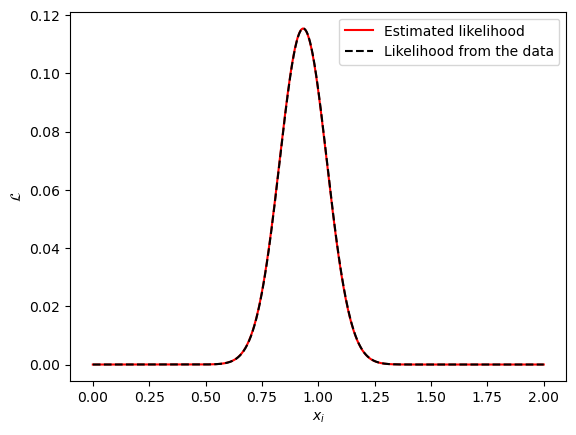

In [14]:
new_likelihood = norm.pdf(x_grid, loc = ML_estimator, scale = sigma_mu[index_max])
plt.plot(x_grid, new_likelihood*(max(tot_likelihood)/max(new_likelihood)), color = 'red', label = 'Estimated likelihood')
plt.plot(x_grid, tot_likelihood, color = 'black', label = 'Likelihood from the data', ls='--')
plt.xlabel('$x_i$')
plt.ylabel('$\mathcal{L}$')
plt.legend()
plt.show()